In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
golf_df = pd.read_csv("PGA Stats 2021.csv")

In [3]:
golf_df

,PLAYER NAME,ROUNDS---sg: approach the green---APPROACH THE GREEN,AVERAGE---sg: approach the green---APPROACH THE GREEN,TOTAL SG:APP---sg: approach the green---APPROACH THE GREEN,MEASURED ROUNDS---sg: approach the green---APPROACH THE GREEN,ROUNDS---greens in regulation percentage---APPROACH THE GREEN,%---greens in regulation percentage---APPROACH THE GREEN,GREENS HIT---greens in regulation percentage---APPROACH THE GREEN,# HOLES---greens in regulation percentage---APPROACH THE GREEN,RELATIVE/PAR---greens in regulation percentage---APPROACH THE GREEN,...,# OF ATTEMPTS---proximity to hole---APPROACH THE GREEN,GIR RANK---proximity to hole---APPROACH THE GREEN,ROUNDS---gir percentage from other than fairway---APPROACH THE GREEN,%---gir percentage from other than fairway---APPROACH THE GREEN,GREENS HIT---gir percentage from other than fairway---APPROACH THE GREEN,# OF HOLES---gir percentage from other than fairway---APPROACH THE GREEN,ROUNDS---gir percentage from fairway---APPROACH THE GREEN,%---gir percentage from fairway---APPROACH THE GREEN,GREENS HIT---gir percentage from fairway---APPROACH THE GREEN,# OF HOLES---gir percentage from fairway---APPROACH THE GREEN
0,Collin Morikawa,83,1.170,77.191,66,83,70.80,994,1404,-0.31,...,1177,1 Under,83,54.22,180,332,83,80.13,609,760
1,Paul Casey,75,0.895,51.920,58,75,68.83,892,1296,-0.28,...,1030,1 Under,75,54.76,207,378,75,78.46,488,622
2,Justin Thomas,87,0.887,60.283,68,87,67.79,1025,1512,-0.35,...,1210,1 Under,87,51.25,266,519,87,82.08,536,653
3,Keegan Bradley,90,0.856,66.749,78,90,69.96,1083,1548,-0.27,...,1391,1 Under,90,52.03,218,419,90,80.87,630,779
4,Daniel Berger,87,0.834,60.915,73,87,70.50,1066,1512,-0.31,...,1309,2 Under,87,56.16,228,406,87,79.61,613,770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Kris Ventura,78,-0.751,-39.070,52,78,61.98,781,1260,-0.29,...,922,Over,78,50.61,209,413,78,72.91,409,561
192,Brian Gay,72,-0.774,-47.989,62,72,60.71,765,1260,-0.26,...,1098,Over,72,49.24,195,396,72,72.53,425,586
193,Sebastian Cappelen,60,-0.800,-30.402,38,60,60.91,592,972,-0.27,...,675,Over,60,50.14,182,363,60,74.68,292,391
194,Martin Trainer,63,-1.458,-69.993,48,63,55.46,589,1062,-0.27,...,848,Over,63,47.10,195,414,63,66.18,270,408


In [4]:
i = 4
cats = []
for x in golf_df.columns[4:]:
    if x[:6] == 'ROUNDS':
        golf_df.drop(x, axis =1 , inplace=True)
        cats.append(x)
        i = i +1
    elif x[:6] != 'ROUNDS':
        i = i+1

In [6]:
cats = pd.DataFrame(cats)
cats.nunique()

0    40
dtype: int64

In [5]:
golf_df

,PLAYER NAME,ROUNDS---sg: approach the green---APPROACH THE GREEN,AVERAGE---sg: approach the green---APPROACH THE GREEN,TOTAL SG:APP---sg: approach the green---APPROACH THE GREEN,MEASURED ROUNDS---sg: approach the green---APPROACH THE GREEN,%---greens in regulation percentage---APPROACH THE GREEN,GREENS HIT---greens in regulation percentage---APPROACH THE GREEN,# HOLES---greens in regulation percentage---APPROACH THE GREEN,RELATIVE/PAR---greens in regulation percentage---APPROACH THE GREEN,AVG---average distance of birdie putts made---PUTTING,...,AVG---proximity to hole---APPROACH THE GREEN,TOTAL DISTANCE (FEET)---proximity to hole---APPROACH THE GREEN,# OF ATTEMPTS---proximity to hole---APPROACH THE GREEN,GIR RANK---proximity to hole---APPROACH THE GREEN,%---gir percentage from other than fairway---APPROACH THE GREEN,GREENS HIT---gir percentage from other than fairway---APPROACH THE GREEN,# OF HOLES---gir percentage from other than fairway---APPROACH THE GREEN,%---gir percentage from fairway---APPROACH THE GREEN,GREENS HIT---gir percentage from fairway---APPROACH THE GREEN,# OF HOLES---gir percentage from fairway---APPROACH THE GREEN
0,Collin Morikawa,83,1.170,77.191,66,70.80,994,1404,-0.31,"8' 3""",...,"33' 9""",39755.333,1177,1 Under,54.22,180,332,80.13,609,760
1,Paul Casey,75,0.895,51.920,58,68.83,892,1296,-0.28,"8' 2""",...,"34' 0""",35040.833,1030,1 Under,54.76,207,378,78.46,488,622
2,Justin Thomas,87,0.887,60.283,68,67.79,1025,1512,-0.35,"8' 1""",...,"35' 3""",42651.917,1210,1 Under,51.25,266,519,82.08,536,653
3,Keegan Bradley,90,0.856,66.749,78,69.96,1083,1548,-0.27,"8' 9""",...,"35' 5""",49318.000,1391,1 Under,52.03,218,419,80.87,630,779
4,Daniel Berger,87,0.834,60.915,73,70.50,1066,1512,-0.31,"9' 10""",...,"35' 3""",46191.500,1309,2 Under,56.16,228,406,79.61,613,770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Kris Ventura,78,-0.751,-39.070,52,61.98,781,1260,-0.29,"10' 5""",...,"39' 6""",36427.000,922,Over,50.61,209,413,72.91,409,561
192,Brian Gay,72,-0.774,-47.989,62,60.71,765,1260,-0.26,"9' 0""",...,"38' 4""",42113.500,1098,Over,49.24,195,396,72.53,425,586
193,Sebastian Cappelen,60,-0.800,-30.402,38,60.91,592,972,-0.27,"10' 2""",...,"37' 10""",25518.417,675,Over,50.14,182,363,74.68,292,391
194,Martin Trainer,63,-1.458,-69.993,48,55.46,589,1062,-0.27,"8' 4""",...,"42' 2""",35750.833,848,Over,47.10,195,414,66.18,270,408


# Exploratory Data Analysis
I will be taking a look at various graphs to see what I can learn about the data. I will comment along the way with insights and comments

The graph below is a scatter plot of the Total Number of Birdies Made vs. the Total Number of One Putts. A very noticable correlation that as more one putts are made, so are more birdies whcih makes sense.

[Text(0.5, 0, 'Total Birdies'),
 Text(0, 0.5, 'Total 1 Putts'),
 Text(0.5, 1.0, 'Total 1 Putts vs. Total Birdies')]

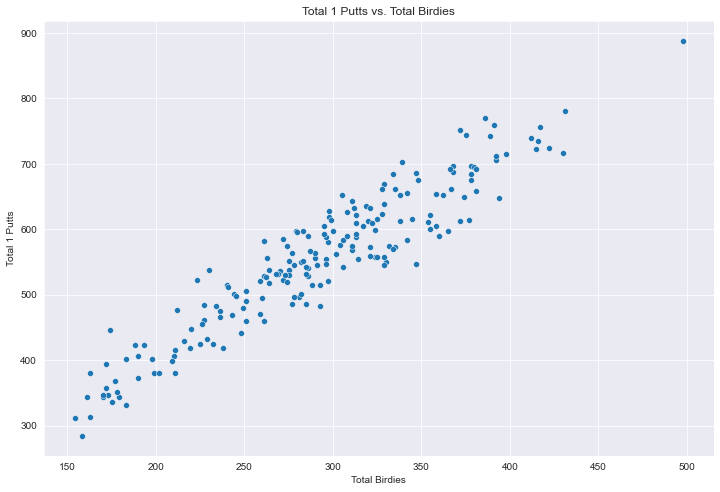

In [21]:
#golf_df['TOTAL---total birdies---SCORING']
#golf_df['AVG---1-putts per round---PUTTING']
#golf_df['TOTAL 1 PUTTS---1-putts per round---PUTTING']
sns.set_style('darkgrid')
plt.figure(figsize = (12,8))
ax = sns.scatterplot(data = golf_df, x = 'TOTAL---total birdies---SCORING', y = 'TOTAL 1 PUTTS---1-putts per round---PUTTING')
ax.set(xlabel = 'Total Birdies', ylabel = 'Total 1 Putts', title = 'Total 1 Putts vs. Total Birdies')

I wanted to check out that outlier in the top right, looks like Sungjae Im. He has been putting very well this past season after doing some extensive training with the putter. 

In [7]:
golf_df['TOTAL---total birdies---SCORING'].idxmax()
golf_df['PLAYER NAME'][64]

'Sungjae Im'

In [8]:
ppr = golf_df[['AVG---putts per round - round 1---PUTTING','AVG---putts per round - round 2---PUTTING','AVG---putts per round - round 3---PUTTING','AVG---putts per round - round 4---PUTTING']]


(array([24., 25., 26., 27., 28., 29., 30., 31., 32., 33.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

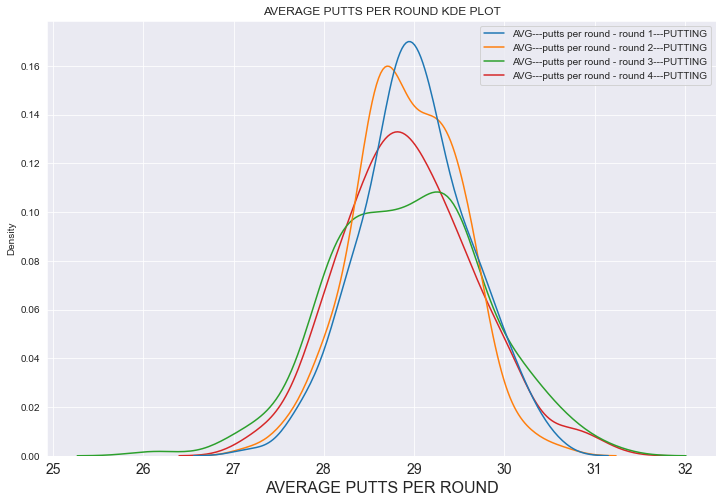

In [9]:
plt.figure(figsize = (12,8))
ax = sns.kdeplot(data = ppr)
ax.set_xlabel('AVERAGE PUTTS PER ROUND', fontsize = 16)
ax.set_title('AVERAGE PUTTS PER ROUND KDE PLOT')
plt.xticks(fontsize=14)

Text(0.5, 1.0, 'GIR from the Fairway vs. Total Birdies')

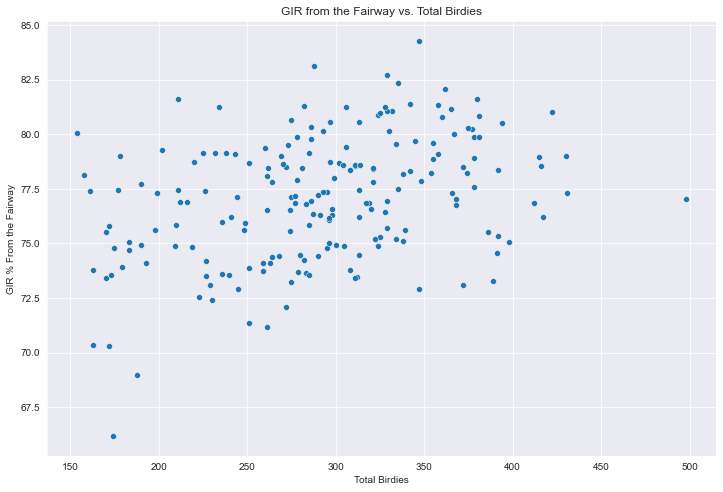

In [19]:
#golf_df["%---gir percentage from fairway---APPROACH THE GREEN"]
plt.figure(figsize = (12,8))
ax = sns.scatterplot(data = golf_df, y = "%---gir percentage from fairway---APPROACH THE GREEN", x ='TOTAL---total birdies---SCORING' )
ax.set_xlabel('Total Birdies')
ax.set_ylabel('GIR % From the Fairway')
ax.set_title('GIR from the Fairway vs. Total Birdies')


In [11]:
corr_list = pd.DataFrame(golf_df[['PLAYER NAME',
'AVG---scoring average---SCORING',
'TOTAL SG:OTT---sg: off-the-tee---OFF THE TEE',
'TOTAL SG:PUTTING---sg: putting---PUTTING',
'TOTAL SG:ARG---sg: around-the-green---AROUND THE GREEN',
'TOTAL SG:T2G---sg: total---SCORING',
'TOTAL 1 PUTTS---1-putts per round---PUTTING',
'TOTAL---total birdies---SCORING',
'TOTAL---total eagles---SCORING',
'AVG.---driving distance---OFF THE TEE',
'AVG (%)---percentage of yardage covered by tee shots---OFF THE TEE',
'AVG---round 1 scoring average---SCORING',
'AVG---round 2 scoring average---SCORING',
'AVG---round 3 scoring average---SCORING',
'AVG---round 4 scoring average---SCORING',
'AVG---putts per round - round 1---PUTTING',
'AVG---putts per round - round 2---PUTTING',
'AVG---putts per round - round 3---PUTTING',
'AVG---putts per round - round 4---PUTTING',
'AVG---3-putts per round---PUTTING',
'AVG---1-putts per round---PUTTING',
'%---left tendency---OFF THE TEE',
'%---right tendency---OFF THE TEE',
'%---scrambling---AROUND THE GREEN',
'%---driving accuracy percentage---OFF THE TEE',
'%---gir percentage from fairway---APPROACH THE GREEN',
'%---gir percentage from other than fairway---APPROACH THE GREEN',
'%---hit fairway percentage---OFF THE TEE',
'%---going for the green - birdie or better---APPROACH THE GREEN',
'%---going for the green - hit green pct.---APPROACH THE GREEN',
'%---rough tendency---OFF THE TEE',
'%---sand save percentage---AROUND THE GREEN',
'VALUE---ball striking---OFF THE TEE']])


In [15]:
corr_list

,PLAYER NAME,AVG---scoring average---SCORING,TOTAL SG:OTT---sg: off-the-tee---OFF THE TEE,TOTAL SG:PUTTING---sg: putting---PUTTING,TOTAL SG:ARG---sg: around-the-green---AROUND THE GREEN,TOTAL SG:T2G---sg: total---SCORING,TOTAL 1 PUTTS---1-putts per round---PUTTING,TOTAL---total birdies---SCORING,TOTAL---total eagles---SCORING,AVG.---driving distance---OFF THE TEE,...,%---scrambling---AROUND THE GREEN,%---driving accuracy percentage---OFF THE TEE,%---gir percentage from fairway---APPROACH THE GREEN,%---gir percentage from other than fairway---APPROACH THE GREEN,%---hit fairway percentage---OFF THE TEE,%---going for the green - birdie or better---APPROACH THE GREEN,%---going for the green - hit green pct.---APPROACH THE GREEN,%---rough tendency---OFF THE TEE,%---sand save percentage---AROUND THE GREEN,VALUE---ball striking---OFF THE TEE
0,Collin Morikawa,70.109,18.534,-30.151,5.082,100.835,550,330,6,295.2,...,57.56,69.60,80.13,54.22,69.37,60.82,18.13,21.32,53.93,15
1,Paul Casey,70.176,14.950,-4.248,8.121,75.005,496,281,8,303.9,...,61.63,62.20,78.46,54.76,62.63,65.10,26.85,23.13,47.19,39
2,Justin Thomas,69.773,15.961,1.763,20.158,96.414,652,362,16,303.9,...,61.81,55.72,82.08,51.25,54.97,62.78,30.00,30.34,56.06,185
3,Keegan Bradley,70.489,25.519,-42.777,12.907,105.174,558,324,11,300.2,...,59.14,65.03,80.87,52.03,65.58,58.42,25.25,23.81,50.00,17
4,Daniel Berger,69.862,19.245,15.593,-1.209,78.982,600,355,9,296.7,...,63.00,65.48,79.61,56.16,65.55,62.63,26.32,24.90,54.92,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Kris Ventura,72.182,-3.632,22.595,-28.686,-71.385,498,245,12,304.7,...,52.82,57.60,72.91,50.61,56.76,57.69,23.08,30.28,42.34,249
192,Brian Gay,72.193,-40.700,12.597,0.601,-88.083,522,223,10,286.8,...,56.77,59.67,72.53,49.24,60.19,61.90,21.90,26.43,51.92,379
193,Sebastian Cappelen,72.557,-4.766,1.904,-24.020,-59.184,401,183,4,299.3,...,55.26,51.86,74.68,50.14,52.12,55.13,20.51,33.20,47.13,360
194,Martin Trainer,73.131,-28.672,13.283,-0.086,-98.744,446,174,8,303.6,...,56.24,49.64,66.18,47.10,50.46,52.78,23.15,33.90,50.00,355


Using the list above I created a heatmap of the correlation matrix for the select columns. There are some interesting correlations between the columns: <br>
<br>
    Average Driving Distance and Rough Tendency are positively correlated. The makes sense that as you tend to hit is farther your accuracy suffers. This also holds true as you move to additional categories such as hit fairway %. 
<br>
<br>
    Another positive correlation that makes sense is the relationship between the percentage of sand saves and the average number of 1 putts per round. If you're making sand saves (a par out of the bunker after a missed green in regulation) you will have to be making 1 putts for par. 
<br>
<br>
    And lastly the postive correlation that we saw before of Total 1 putts per round and Total birdies. This relationship is almost perfectly correlated. 
<br>
<br>
    There weren't any correlations that jumped out to me that were suprising or unqiue. The vast majority of the relationships aligned with the expected results.


<AxesSubplot:>

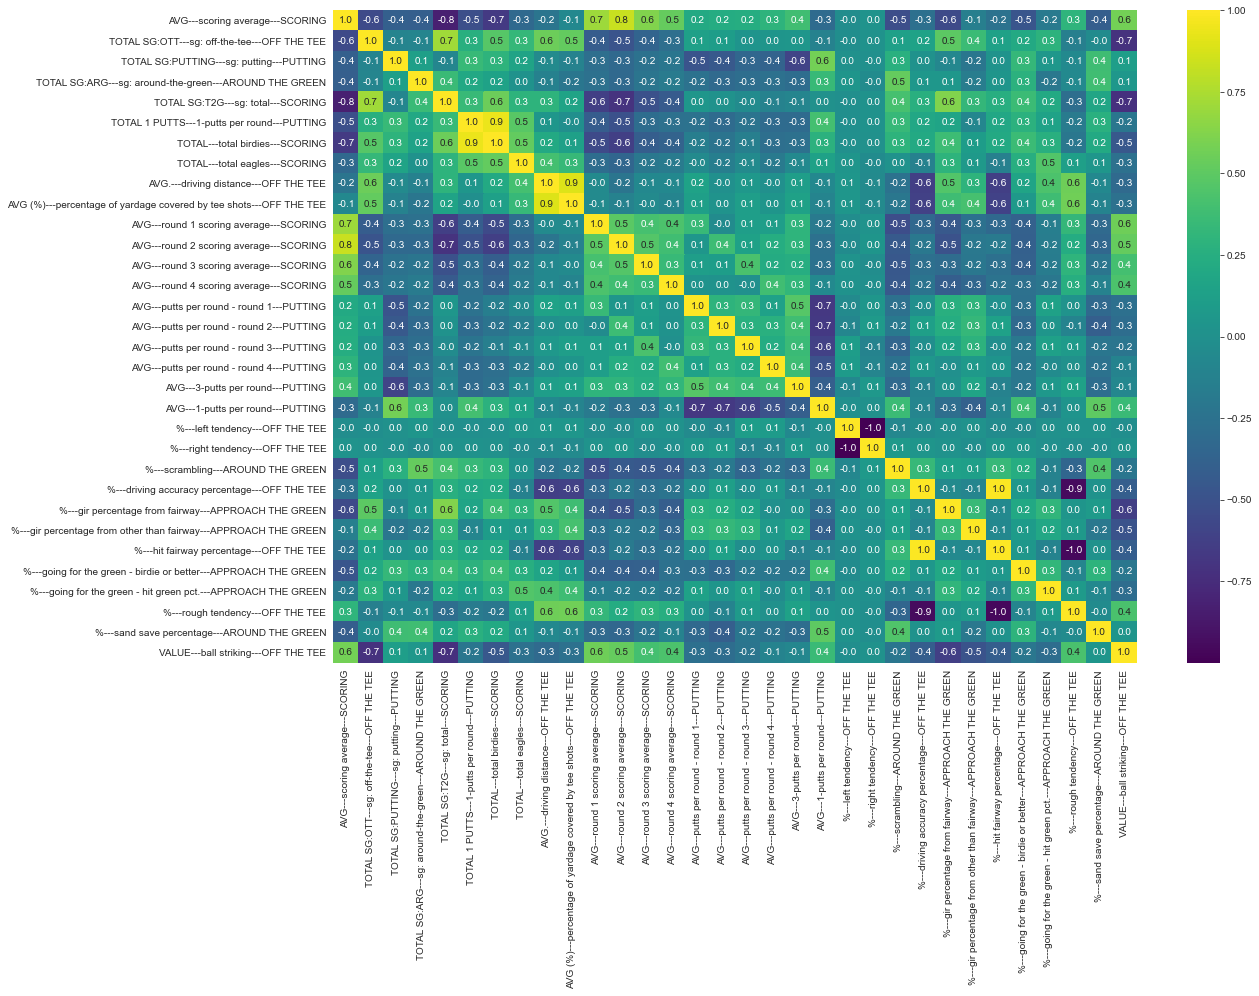

In [14]:
plt.figure(figsize = (18,12))
sns.heatmap(corr_list.corr(), cmap = 'viridis',annot = True , fmt = '.1f')

In [17]:
corr_list.corr()

,AVG---scoring average---SCORING,TOTAL SG:OTT---sg: off-the-tee---OFF THE TEE,TOTAL SG:PUTTING---sg: putting---PUTTING,TOTAL SG:ARG---sg: around-the-green---AROUND THE GREEN,TOTAL SG:T2G---sg: total---SCORING,TOTAL 1 PUTTS---1-putts per round---PUTTING,TOTAL---total birdies---SCORING,TOTAL---total eagles---SCORING,AVG.---driving distance---OFF THE TEE,AVG (%)---percentage of yardage covered by tee shots---OFF THE TEE,...,%---scrambling---AROUND THE GREEN,%---driving accuracy percentage---OFF THE TEE,%---gir percentage from fairway---APPROACH THE GREEN,%---gir percentage from other than fairway---APPROACH THE GREEN,%---hit fairway percentage---OFF THE TEE,%---going for the green - birdie or better---APPROACH THE GREEN,%---going for the green - hit green pct.---APPROACH THE GREEN,%---rough tendency---OFF THE TEE,%---sand save percentage---AROUND THE GREEN,VALUE---ball striking---OFF THE TEE
AVG---scoring average---SCORING,1.000000,-0.551441,-0.397033,-0.402755,-0.823499,-0.516256,-0.657456,-0.321489,-0.220692,-0.066357,...,-0.523527,-0.269925,-0.550435,-0.143517,-0.246082,-0.475349,-0.182974,0.297044,-0.413417,0.576223
TOTAL SG:OTT---sg: off-the-tee---OFF THE TEE,-0.551441,1.000000,-0.100557,-0.089970,0.717021,0.265115,0.470911,0.328683,0.550805,0.520337,...,0.125803,0.153309,0.496325,0.359757,0.143042,0.205702,0.285056,-0.143319,-0.040354,-0.713325
TOTAL SG:PUTTING---sg: putting---PUTTING,-0.397033,-0.100557,1.000000,0.122029,-0.078179,0.349018,0.294510,0.162381,-0.051272,-0.124537,...,0.267211,0.023277,-0.072226,-0.217884,0.023681,0.334174,0.060368,-0.059224,0.375637,0.111618
TOTAL SG:ARG---sg: around-the-green---AROUND THE GREEN,-0.402755,-0.089970,0.122029,1.000000,0.359054,0.200554,0.154700,0.009004,-0.131812,-0.214905,...,0.525140,0.055271,0.060174,-0.157885,0.046221,0.275333,-0.196928,-0.057374,0.383507,0.060597
TOTAL SG:T2G---sg: total---SCORING,-0.823499,0.717021,-0.078179,0.359054,1.000000,0.347483,0.553212,0.290356,0.296527,0.156637,...,0.412239,0.265585,0.617586,0.322949,0.254575,0.361854,0.207525,-0.283492,0.177662,-0.725060
TOTAL 1 PUTTS---1-putts per round---PUTTING,-0.516256,0.265115,0.349018,0.200554,0.347483,1.000000,0.941493,0.477735,0.051306,-0.008252,...,0.341239,0.187621,0.167538,-0.080475,0.187861,0.275867,0.149847,-0.178767,0.269620,-0.211576
TOTAL---total birdies---SCORING,-0.657456,0.470911,0.294510,0.154700,0.553212,0.941493,1.000000,0.515668,0.205077,0.128435,...,0.292060,0.209036,0.371156,0.098740,0.207751,0.365519,0.263143,-0.207424,0.205713,-0.455900
TOTAL---total eagles---SCORING,-0.321489,0.328683,0.162381,0.009004,0.290356,0.477735,0.515668,1.000000,0.402142,0.340333,...,0.010381,-0.130259,0.294933,0.073083,-0.140126,0.252176,0.459268,0.117252,0.054137,-0.262709
AVG.---driving distance---OFF THE TEE,-0.220692,0.550805,-0.051272,-0.131812,0.296527,0.051306,0.205077,0.402142,1.000000,0.896053,...,-0.245610,-0.625282,0.459976,0.290841,-0.628024,0.166027,0.436450,0.558947,-0.066028,-0.317449
AVG (%)---percentage of yardage covered by tee shots---OFF THE TEE,-0.066357,0.520337,-0.124537,-0.214905,0.156637,-0.008252,0.128435,0.340333,0.896053,1.000000,...,-0.205928,-0.609686,0.377123,0.407243,-0.608102,0.072026,0.379662,0.564703,-0.108656,-0.260174


In [22]:
golf_df.to_csv('2021 PGA Tour Filtered Stats.csv', index = False)